# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from scipy.stats import chi2_contingency
import seaborn as sns



# Read the dataset 

In [2]:


train =  pd.read_csv('train.csv')  
test =  pd.read_csv('test.csv')  

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)

Train data shape: (103904, 25)
Test data shape: (25976, 25)


# Univariate Analysis

# Examine the dataset

In [3]:
# Examine the dataset
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])
print("Column names:", train.columns)
print("Data types:\n", train.dtypes)



Number of rows: 103904
Number of columns: 23
Column names: Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Data types:
 Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking               

<font color='pink'>**from the above info we can conclude that**</font>

**the dataset consists of mainy two parts:**

**1-user info which** [Age , Gender, Customer Type , Class ,Type of Travel]

**2-user input data which includes some info about the flight which** [Inflight wifi service,
Departure/Arrival time convenient, Ease of Online booking,Gate location, Food and drink,
Online boarding, Seat comfort,Inflight entertainment, On-board service, Leg room service,
Baggage handling, Checkin service, Inflight service,Cleanliness]

**also the dataset has this data types:**

**1-numerical**[Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes]

**2-ordinal** [
        Inflight wifi service,
       Departure/Arrival time convenient, Ease of Online booking,
       Gate location, Food and drink, Online boarding, Seat comfort,
       Inflight entertainment, On-board service, Leg room service,
       Baggage handling, Checkin service, Inflight service,
       Cleanliness]

**3-nominal**[Gender, Customer Type, Type of Travel, Class]



# Summary statistics

In [4]:
# Summary statistics
# print("Summary statistics:\n", train.describe())
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
train.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [6]:

# Example ordinal data
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

ordinal_data = ordinal_data.astype("str")
ordinal_data.describe(include=['object'])




,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


# Visualize the data - Histograms

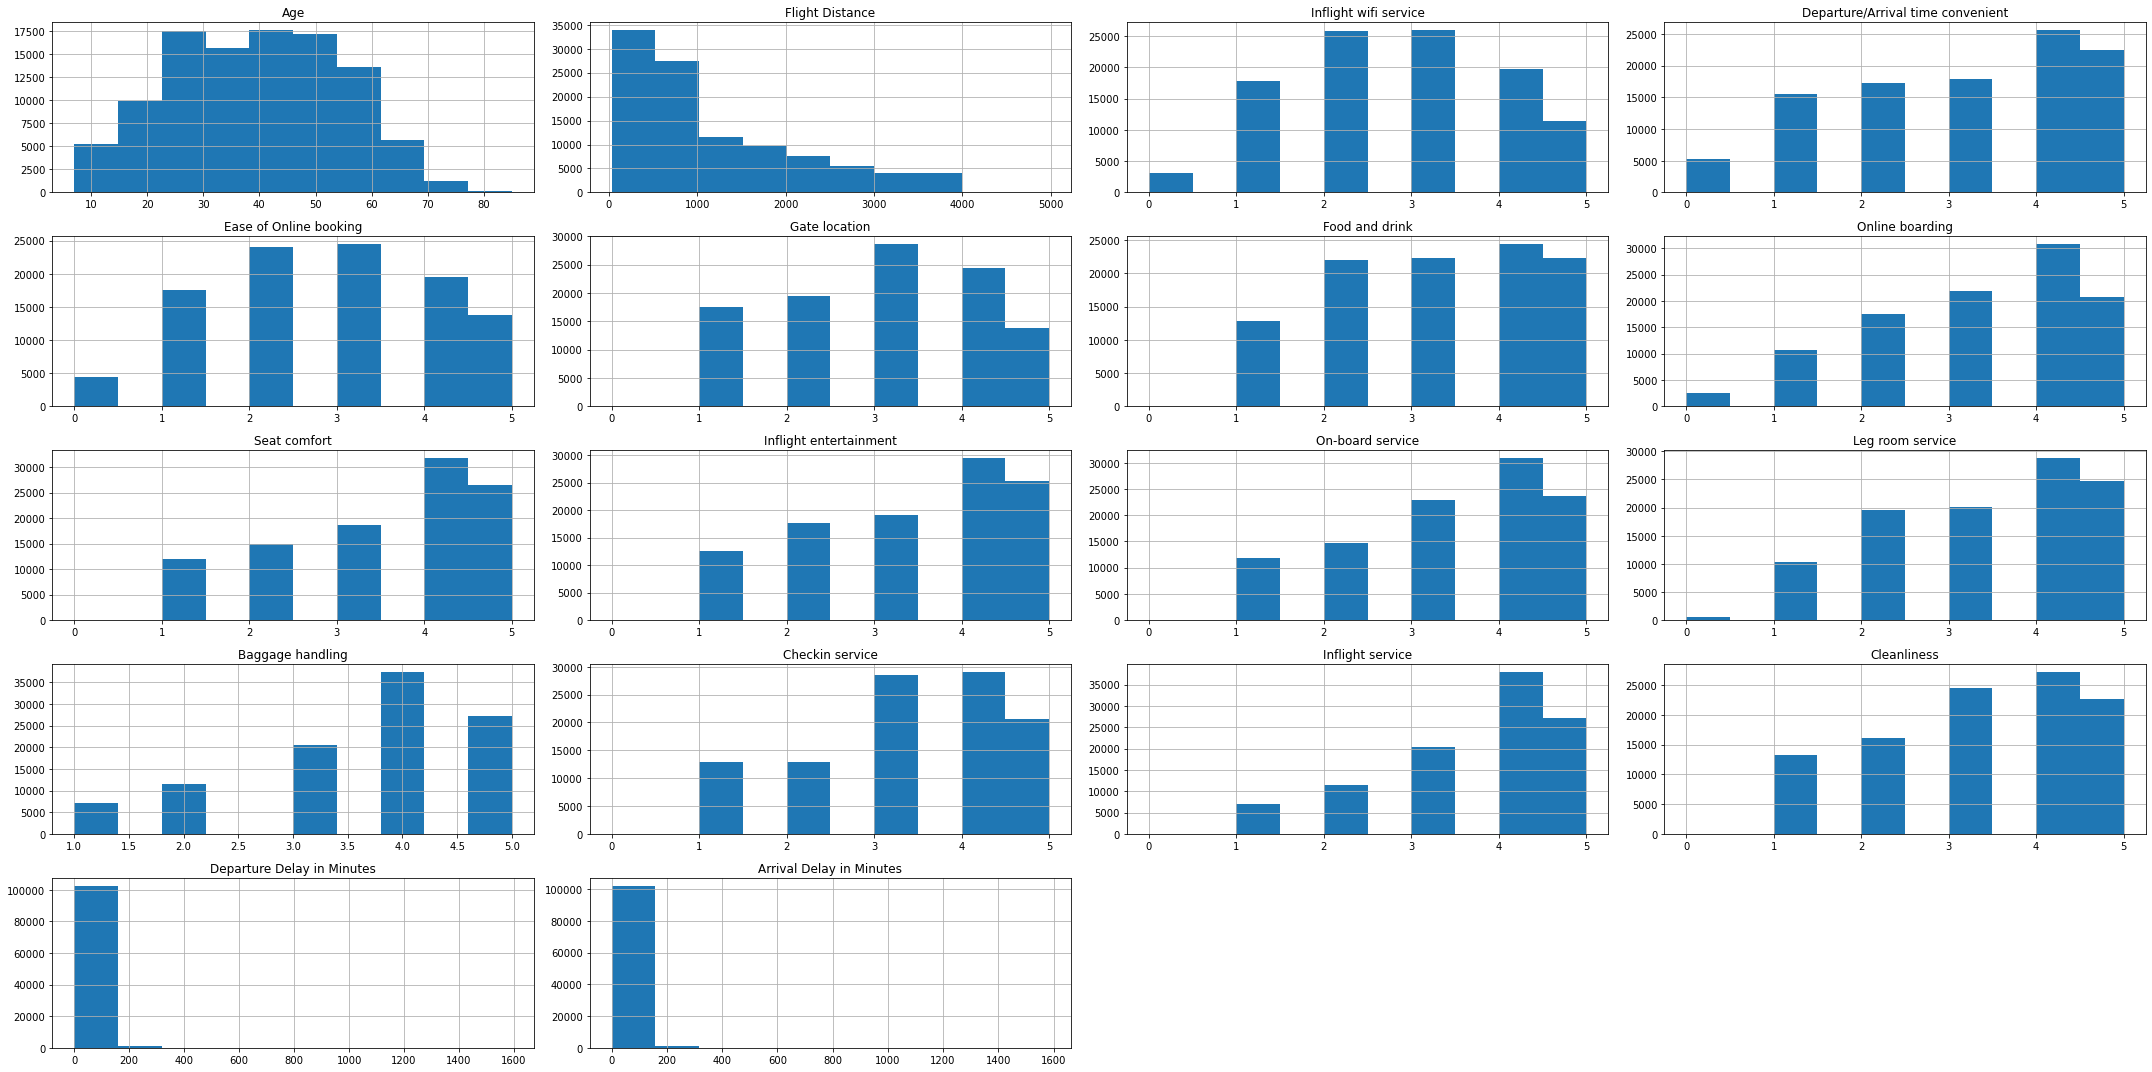

In [7]:
# Visualize the data - Histograms
train.hist(figsize=(30, 15))
plt.tight_layout()
plt.show()



<font color='pink'>**from the above histograms it is shown that**</font>

**the majority of Age is between [22,61]**

**the majority of Flight Distance is between [0,1000]**

**the majority of Inflight wifi service is 2,3**

**the majority of Departure/Arrival time convenient is 4,5**

**the majority of Ease of Online booking is 2,3**

**the majority of Gate location is 3,4**

**the majority of Food and drink is 2,3,4,5**

**the majority of Online boarding is 4**

**the majority of Seat comfort is 4,5**

**the majority of Inflight entertainment is 4,5**

**the majority of On-board service is 3,4,5**

**the majority of Leg room service is 4,5**

**the majority of Baggage handling is 4**

**the majority of Checkin service is 3,4**

**the majority of Inflight service is 4,5**

**the majority of Cleanliness is 3,4,5**

**the majority of Departure Delay in Minutes is [0,200]**

**the majority of Arrival Delay in Minutes is [0,200]**




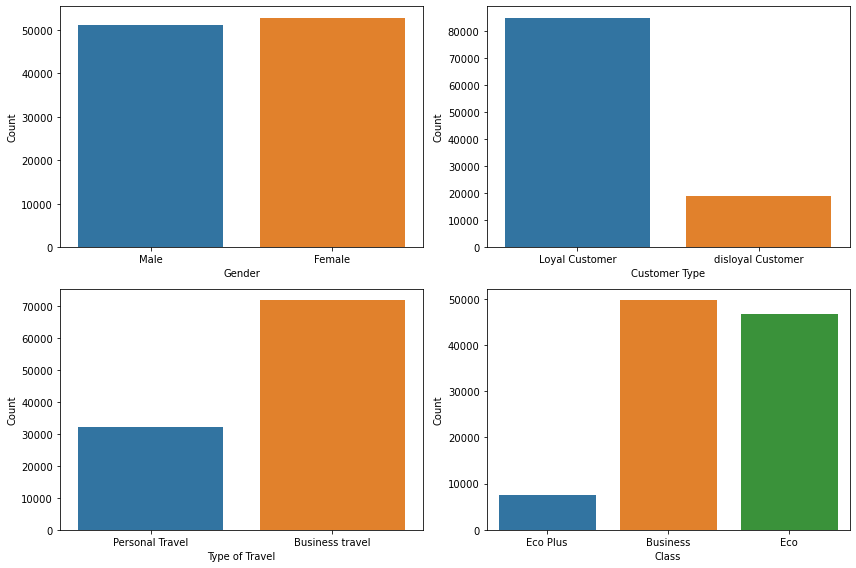

In [8]:


# Filter category columns
categorical_columns = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through categorical columns and plot count plots
for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=categorical_columns, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


<font color='pink'>**as it shown from the histogram**</font>

**the number of males and females customers is amlost close**

**the majority of customer type is loyal customer**

**the majority of  type of travel is business travel**

**the majority of class is business class or echo**

# view missing data (null values)

In [9]:
#  missing data
print("Missing values count:\n", train.isnull().sum())
# train.isnull().sum()


Missing values count:
 Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


**Arrival Delay in Minutes  seems to has alot of values of nulls we can handle them by removing them**

#  Identify outliers - Box plots

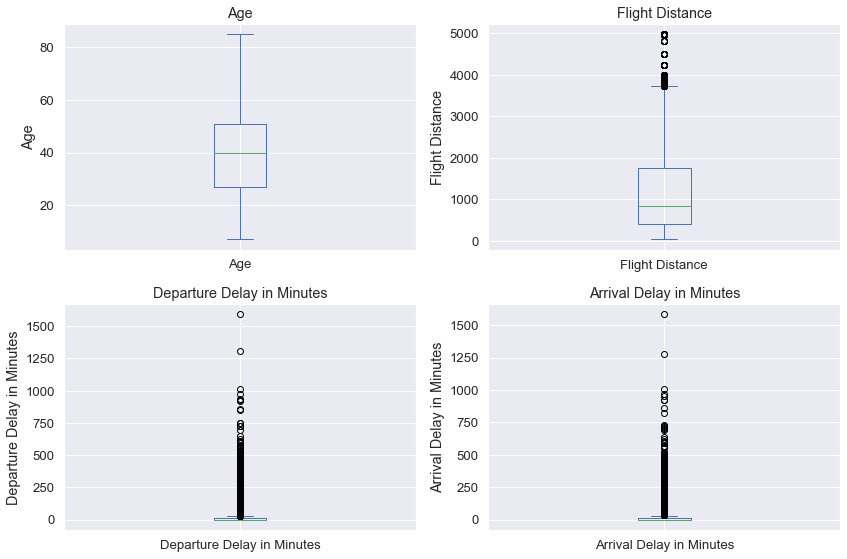

In [35]:

# Filter numeric columns
numeric_columns = train[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through numeric columns and plot box plots
for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    numeric_columns[column].plot(kind='box', ax=ax)
    ax.set_title(column)
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

**Arrival Delay in Minutes and Departure Delay in Minutes   seems to has alot of outliers but they make sense because they are the delay of the flight**

**flight disytance also has some outliers but they make sense also**

# prior class distributions

Baseline class: neutral or dissatisfied


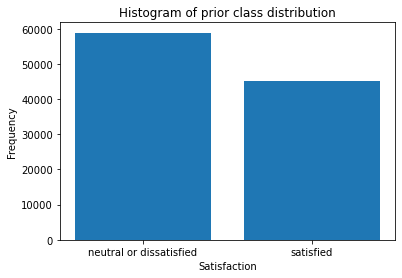

In [11]:
# Baseline Model - ZeroR
baseline_class = train['satisfaction'].value_counts().idxmax()
print("Baseline class:", baseline_class)

# Count the frequency of each category
category_counts = train['satisfaction'].value_counts()

# Create a bar plot to visualize the frequencies
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram of prior class distribution')
plt.show()


**it seems that the customers that are neutral or dissatisfied is more than the satisfied customers**

**the classes seems to be balanced as the difference between them is very small**

 # Random samples

In [12]:
# Random samples

train.sample(n=5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
78221,Male,Loyal Customer,58,Business travel,Business,1020,1,1,1,1,...,4,4,4,4,4,4,3,9,0.0,satisfied
99052,Female,disloyal Customer,33,Business travel,Business,551,4,4,4,4,...,3,4,4,5,3,5,3,0,0.0,neutral or dissatisfied
47392,Male,Loyal Customer,47,Personal Travel,Eco,1034,3,5,3,2,...,4,3,4,4,2,4,2,183,144.0,neutral or dissatisfied
21558,Female,Loyal Customer,69,Personal Travel,Eco Plus,139,4,5,4,1,...,2,2,4,2,5,2,3,0,0.0,satisfied
38200,Female,Loyal Customer,48,Business travel,Business,1802,2,2,2,2,...,4,5,5,4,5,4,5,0,0.0,satisfied


# correlations

# nominal and nominal correlation

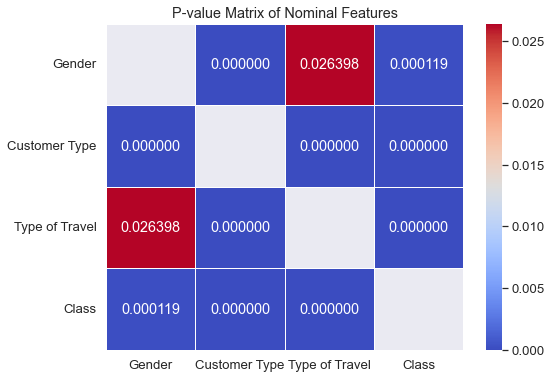

In [13]:


# Select the nominal features
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]

def nominal_correlations():
    p_value_df = pd.DataFrame(index=nominal_features.columns, columns=nominal_features.columns)

    # Iterate over all combinations of nominal features
    for i in range(len(nominal_features.columns)):
        for j in range(i+1, len(nominal_features.columns)):
            feature1 = nominal_features.columns[i]
            feature2 = nominal_features.columns[j]

            # Create a contingency table for the current feature combination
            contingency_table = pd.crosstab(nominal_features[feature1], nominal_features[feature2])

            # Perform the chi-square test for independence
            chi2, p_value, _, _ = chi2_contingency(contingency_table)

            # Store the p-value in the matrix
            p_value_df.loc[feature1, feature2] = p_value
            p_value_df.loc[feature2, feature1] = p_value

    return p_value_df

p_value_df = nominal_correlations()

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Create the heatmap plot
sns.heatmap(p_value_df.astype(float), annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)

# Add plot title
plt.title("P-value Matrix of Nominal Features")

# Display the plot
plt.show()

# numerical and numerical correlation

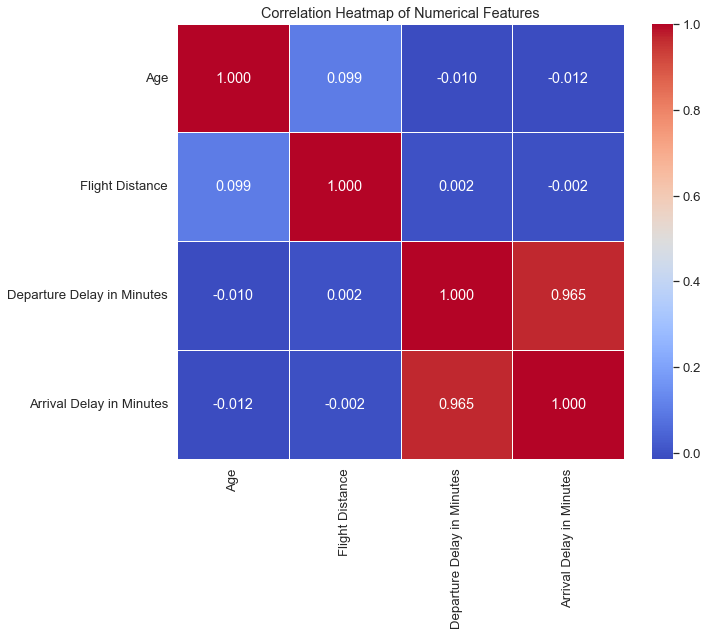

In [14]:

# Select the numertical features
numerical_features = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]
# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**it seems that Departure Delay in Minutes and Arrival Delay in Minutes are stongly positive correlated**

# ordinal and ordinal correlation 

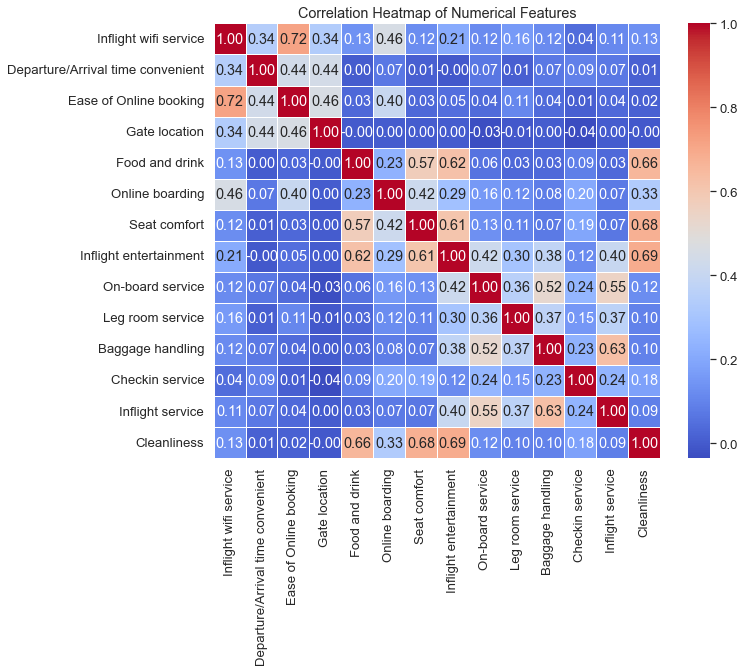

In [15]:

# Select the numertical features
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
# Compute the correlation matrix
correlation_matrix = ordinal_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<font color='pink'>**as we see that**</font>

**Inflight wifi service and Ease of Online booking are positively correlated**

**Cleanliness is correlated by same degree  with Food and drink , Seat comfort , Inflight entertainment** which may have this meaning if the flight is clean the Food and drink , Seat comfort , Inflight entertainment may be good

this may have a good conclusion cleanliness is a very good factor

**Food and drink , Seat comfort , Inflight entertainment are correlated with each other**

# nominal and ordinal correlation

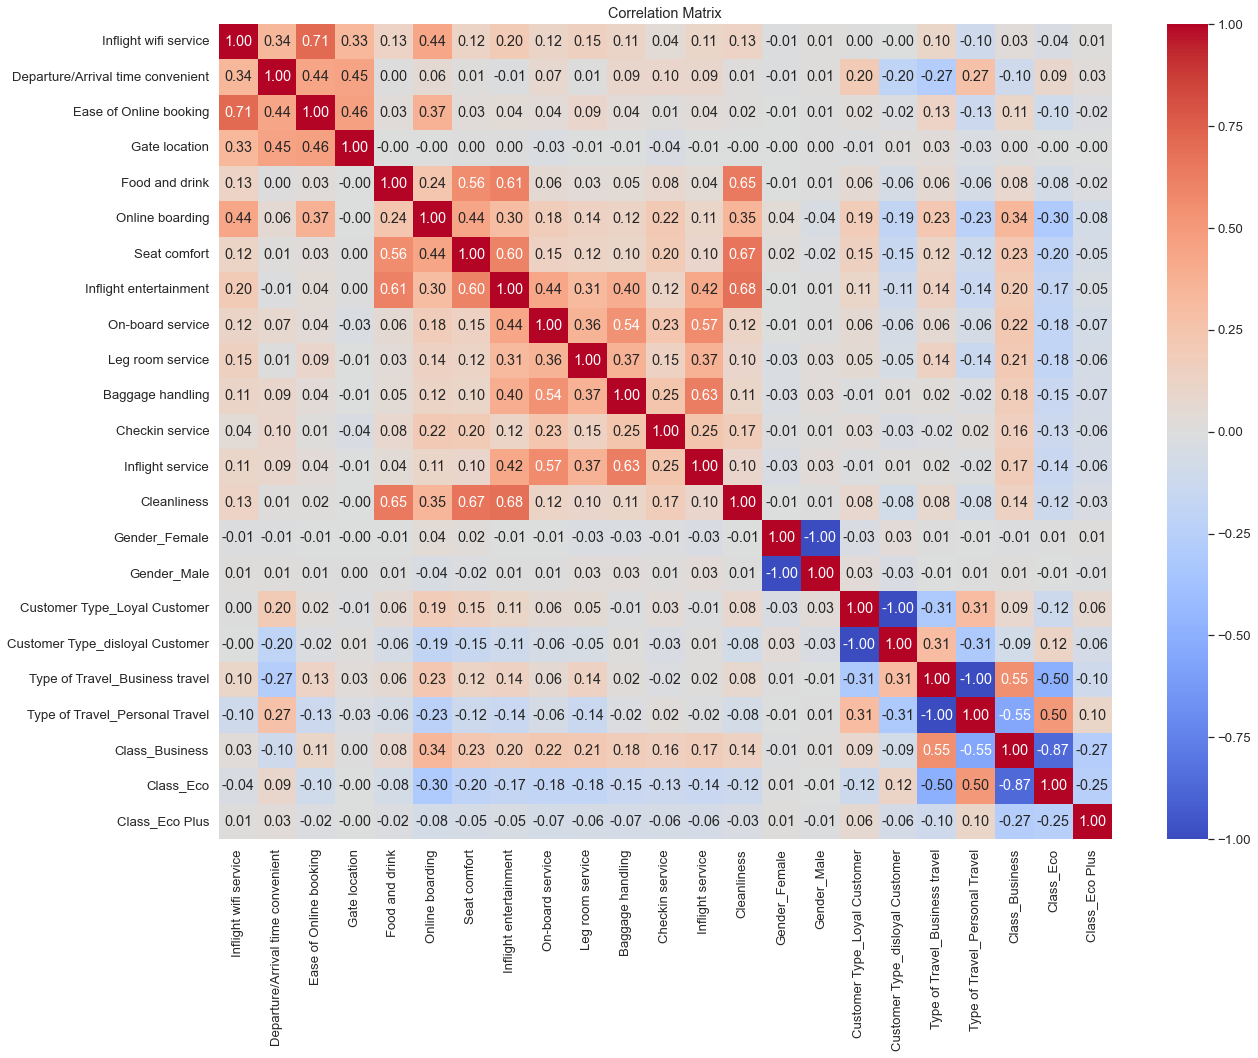

In [16]:
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

# Encode nominal data using one-hot encoding
nominal_encoded = pd.get_dummies(nominal_features)

# Combine ordinal and encoded nominal data frames
combined_df = pd.concat([ordinal_data , nominal_encoded], axis=1)
# Calculate correlation using suitable method (e.g., Spearman's rank correlation)
correlation_matrix = combined_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# ordinal and numerical correlation

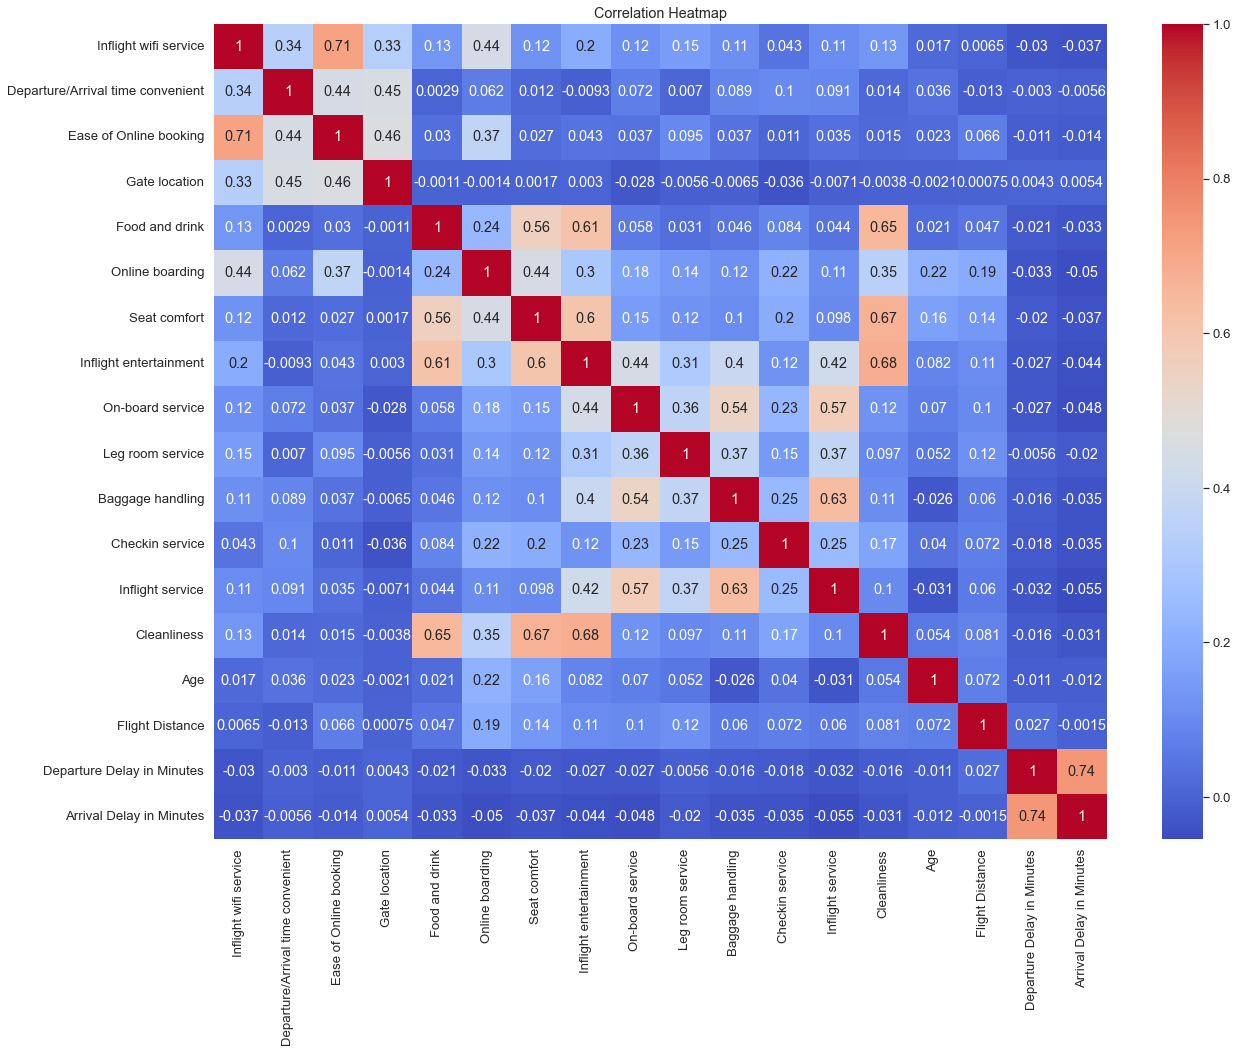

In [17]:
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

numerical_features = train[['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]
# Combine ordinal and encoded nominal data frames
combined_df = pd.concat([ordinal_data , numerical_features], axis=1)
# Calculate correlation using suitable method (e.g., Spearman's rank correlation)
correlation_matrix = combined_df.corr(method='spearman')

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix  , annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**from the correlation matrices there exists correlated elements but not in very high degree the require to remove any of them**

# all types correlation

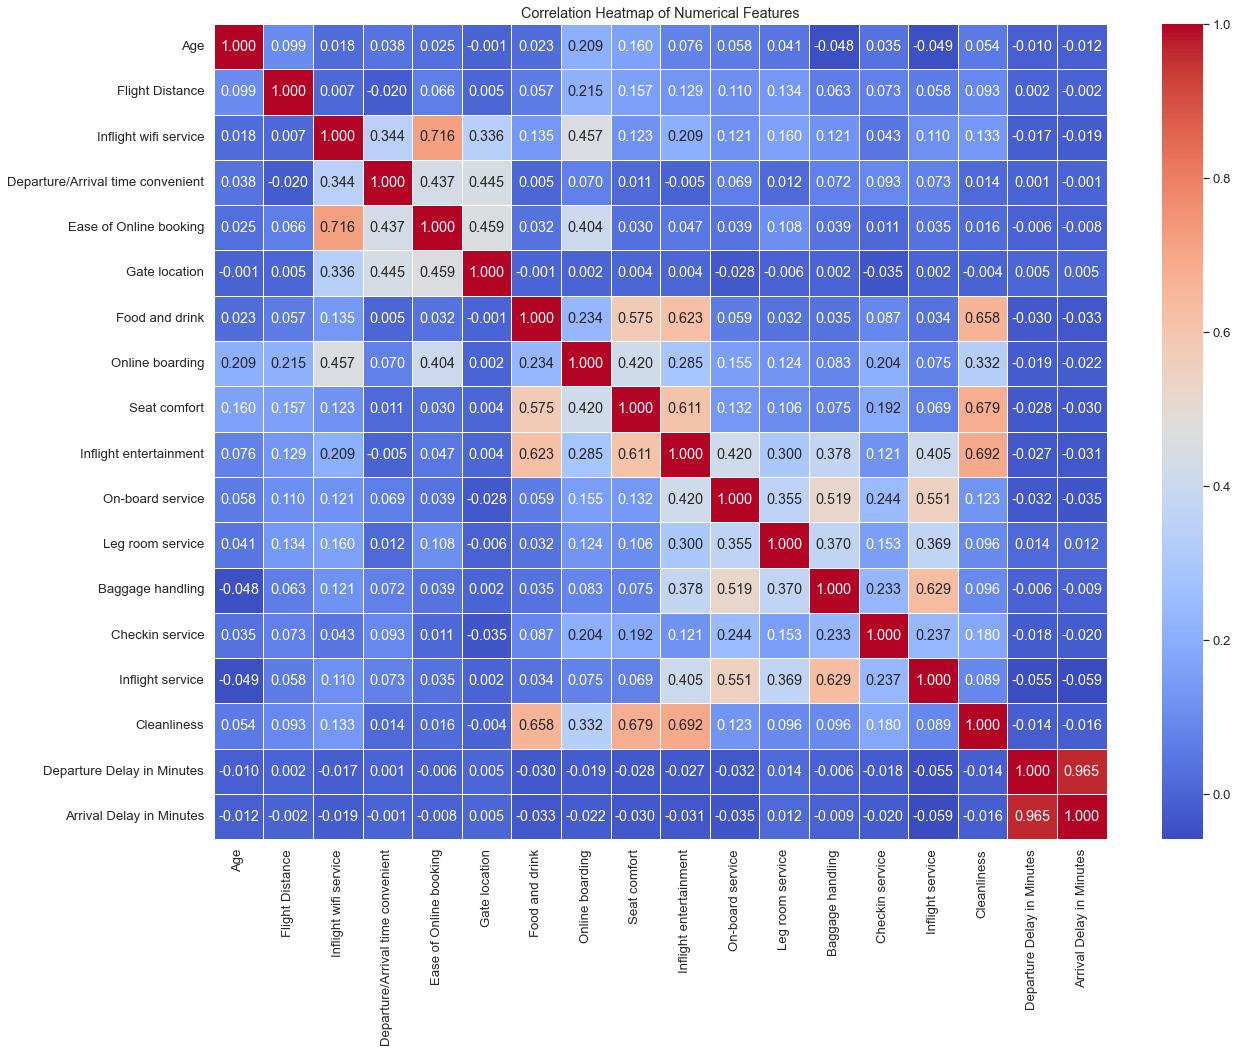

In [37]:

# Compute the correlation matrix
correlation_matrix = train.corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

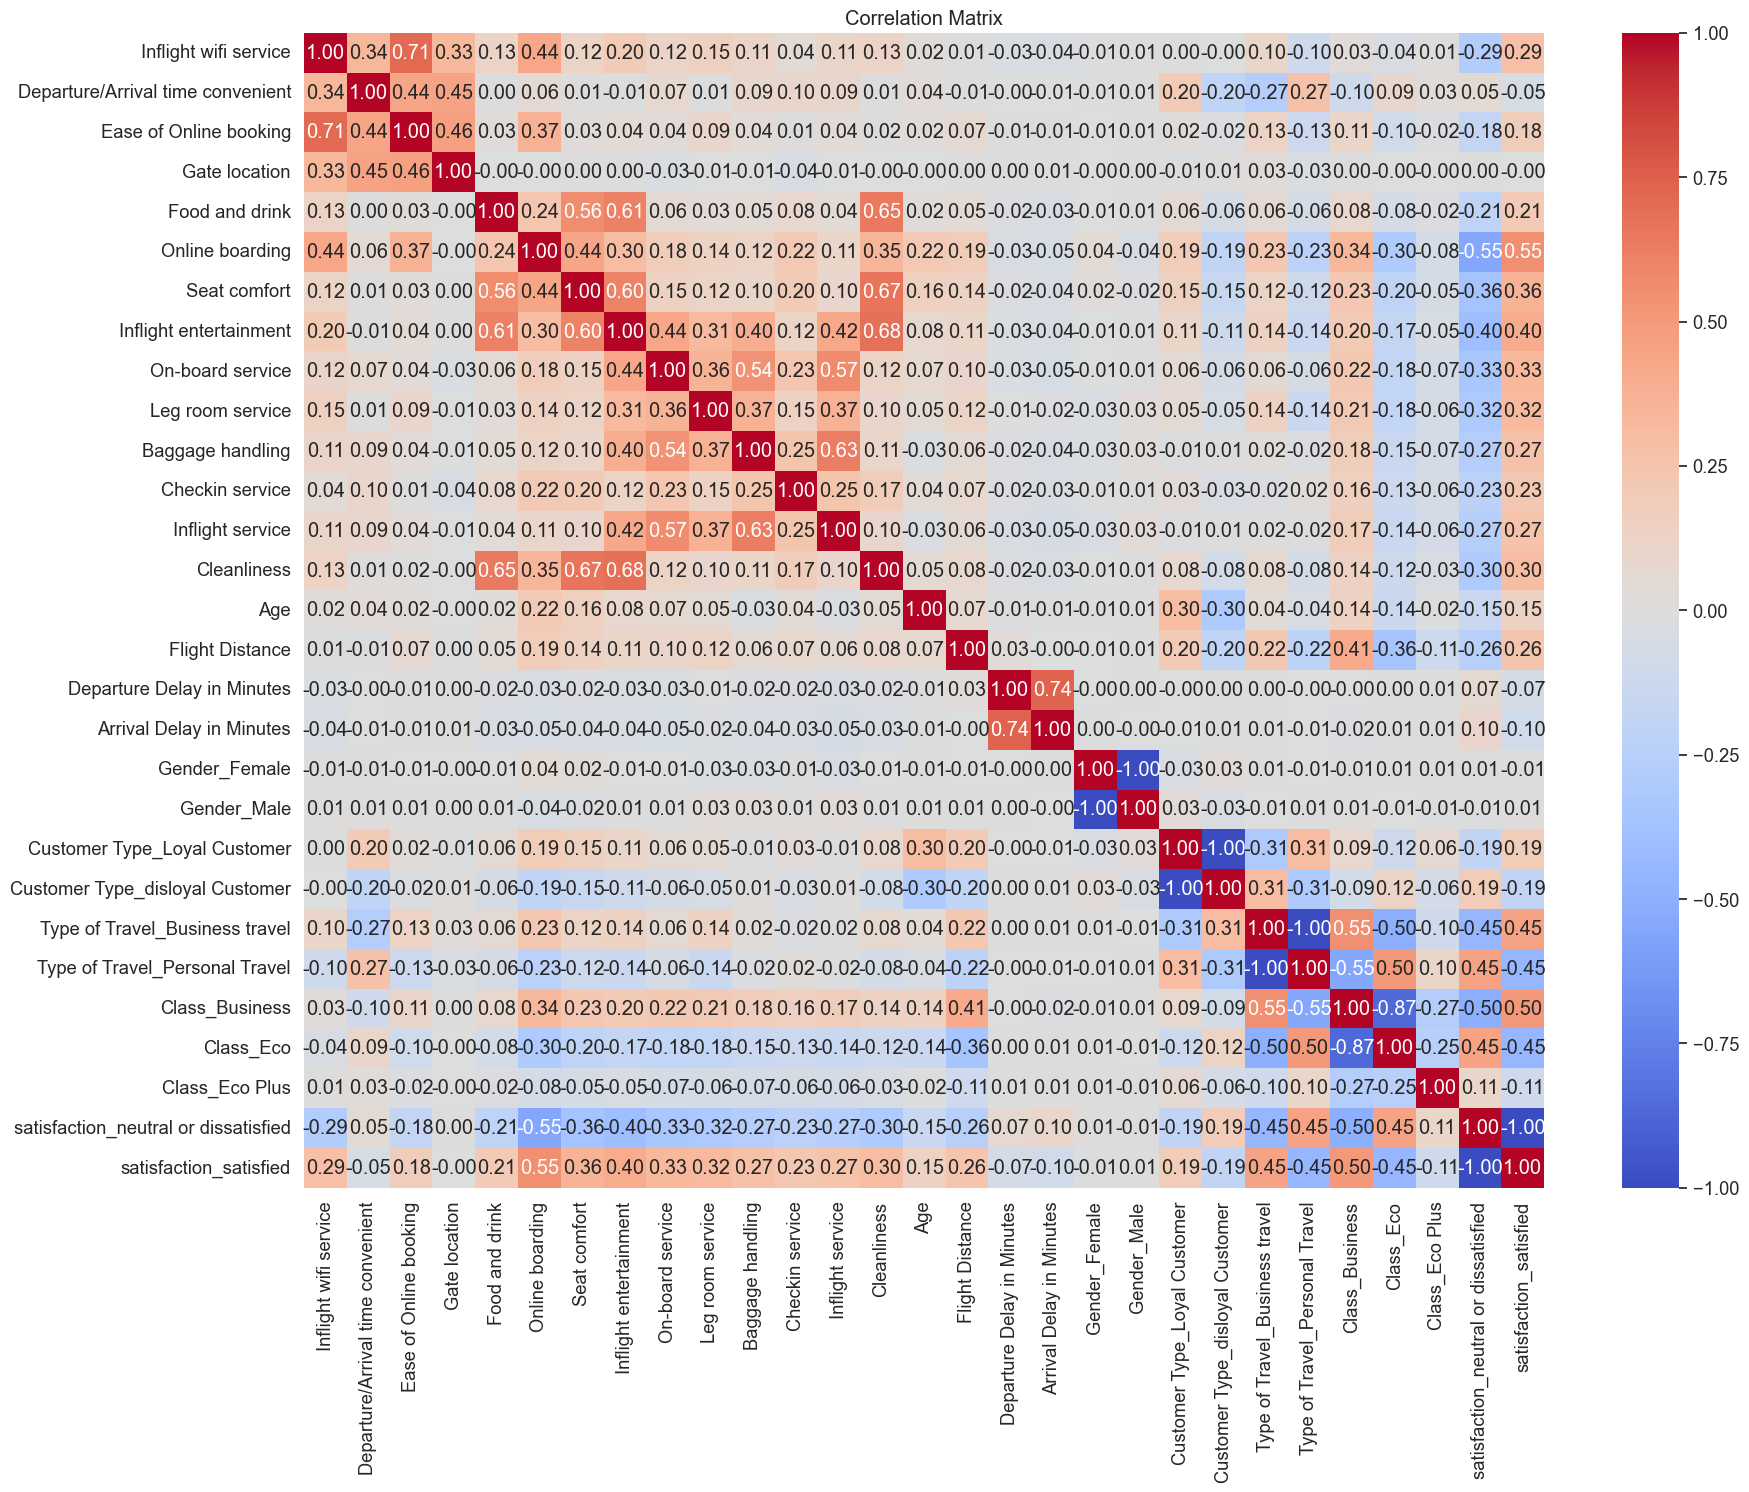

In [25]:
nominal_features = train[['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction']]
ordinal_data = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']]

# Encode nominal data using one-hot encoding
nominal_encoded = pd.get_dummies(nominal_features)

# Combine ordinal and encoded nominal data frames
combined_df = pd.concat([ordinal_data , nominal_encoded], axis=1)
# Calculate correlation using suitable method (e.g., Spearman's rank correlation)
correlation_matrix = combined_df.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
abs_correlation_with_target = correlation_matrix['satisfaction_satisfied'].drop('satisfaction_satisfied').sort_values(ascending=False)
print(abs_correlation_with_target)


Online boarding                         0.550994
Class_Business                          0.503848
Type of Travel_Business travel          0.449000
Inflight entertainment                  0.399504
Seat comfort                            0.362199
On-board service                        0.328301
Leg room service                        0.318343
Cleanliness                             0.303429
Inflight wifi service                   0.287458
Baggage handling                        0.269318
Inflight service                        0.265362
Flight Distance                         0.257274
Checkin service                         0.232603
Food and drink                          0.207237
Customer Type_Loyal Customer            0.187638
Ease of Online booking                  0.177121
Age                                     0.147145
Gender_Male                             0.012211
Gate location                          -0.000137
Gender_Female                          -0.012211
Departure/Arrival ti

# Analyze the data set features with the satisfaction

# user info

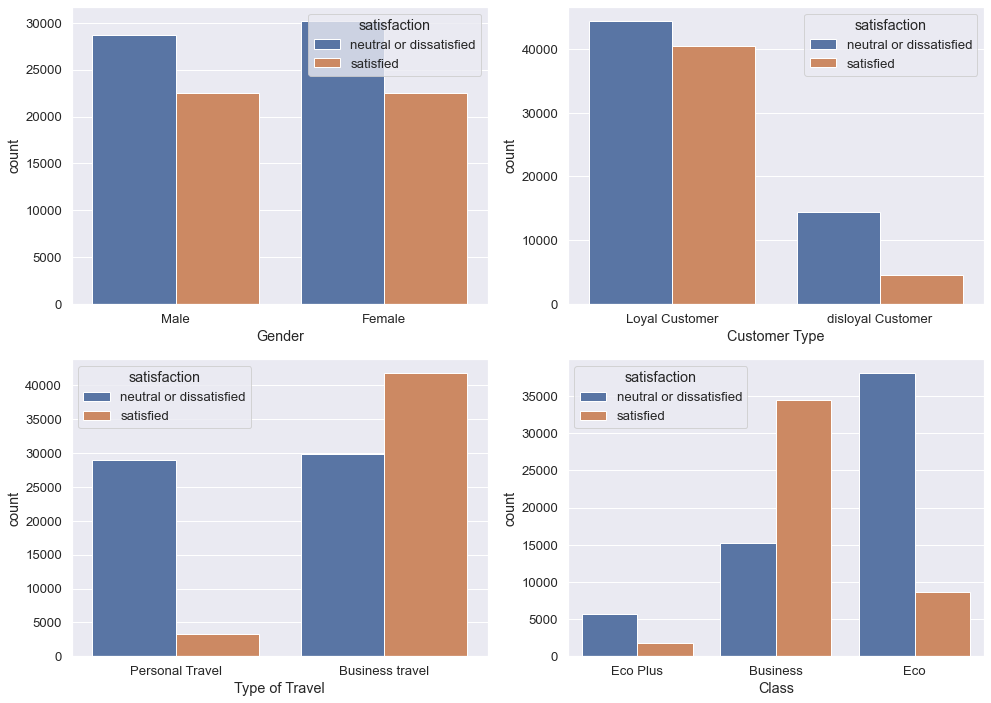

In [31]:
categ_cols = train[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in categ_cols:
    
    # define location
    plt.subplot(2, 2, i+1)
    
    # create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = train)
    
   
    i += 1    

plt.tight_layout()
plt.show()



<font color='pink'>**we can conclude that**</font>

**1-there is a balance between gender and satisfaction so gender don't affect satisfaction**

**2-the majority of Cusomer Type is Loyal Customer**

**3-the majority of Disloyal Customers are neural of disatisfied**

**4-the majority of Type of Travel is a Busines Travel**

**5-the majority of Type Personal Travel are neural of disatisfied**

**6-the majority of Class is Business or Eco**

**7-the majority of Class  Business are satisfied**

**6-the majority of Class Eco are neural of disatisfied**

# user input data

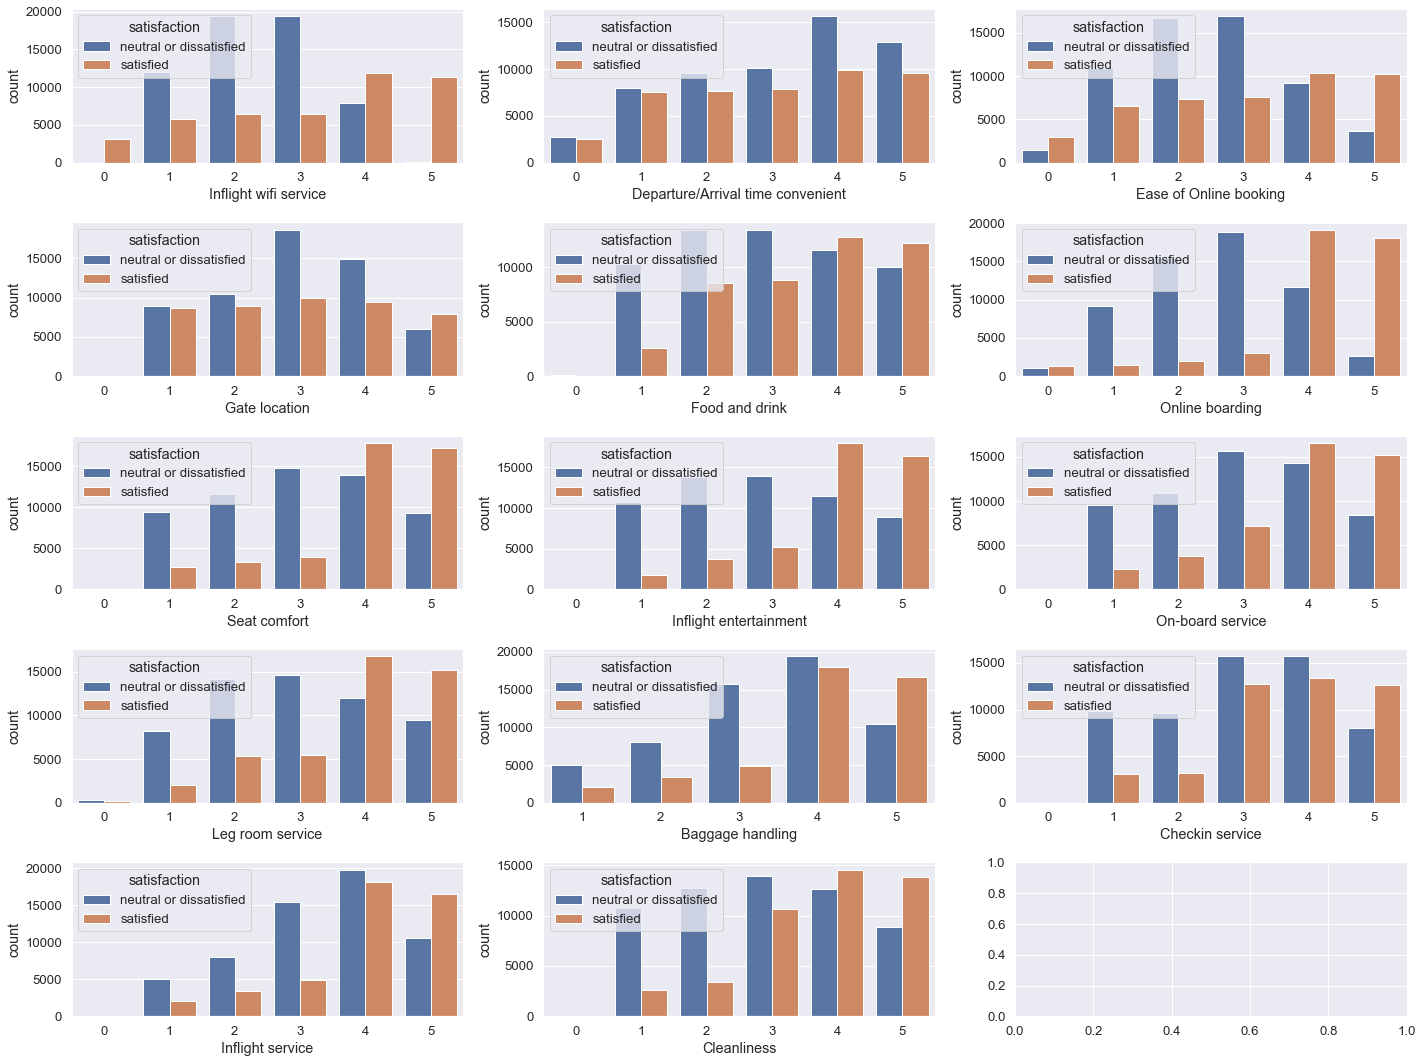

In [32]:
categ_cols = train[[
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))
axs = axs.ravel()

i=0
for col in categ_cols:
    
    # define location
    plt.subplot(5, 3, i+1)
    
    # create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = train)
    
   
    i += 1    

plt.tight_layout()
plt.show()



<font color='pink'>**we can conclude that**</font>

1- the majority of Inflight wifi service are 2,3,4 and the majority of them are neural or dissatisfied

2-the majority of customers who gave Departure/Arrival time convenient

3-the majority of customers who gave Ease of Online booking values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

4-the majority of customers who gave Gate location values 3,4 are neural or dissatisfied

5-the majority of customers who gave food and drink values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

6-the majority of customers who gave  Online boarding values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

7-the majority of customers who gave Seat comfort values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

8-the majority of customers who gave Inflight entertainment values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

9-the majority of customers who gave On-board service values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

10-the majority of customers who gave Leg room service values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

11-the majority of customers who gave Baggage handling values 1,2,3,4 are neural or dissatisfied and the majority who gave 5 are satisfied

12-the majority of customers who gave Checkin service values 1,2,3,4 are neural or dissatisfied and the majority who gave 5 are satisfied

13-the majority of customers who gave Inflight service values 1,2,3,4 are neural or dissatisfied and the majority who gave 5 are satisfied

14-the majority of customers who gave Cleanliness  values 1,2,3 are neural or dissatisfied and the majority who gave 4,5 are satisfied

**at the end we can conclude that the majority of satisfied cusomers those who gave the most of services values 4,5 and the majority of disatisfied who gave 1,2,3**

